# Proxy Design Pattern

- It is used whenever we need a placeholder or representational object that can work in place of the real object. 
- The proxy acts as an intermediatory layer between the client and the real object.
- Can control the access to the real object, add additional functionality, and even restrict client access.

Loading image1.png from disk...
Displaying image1.png


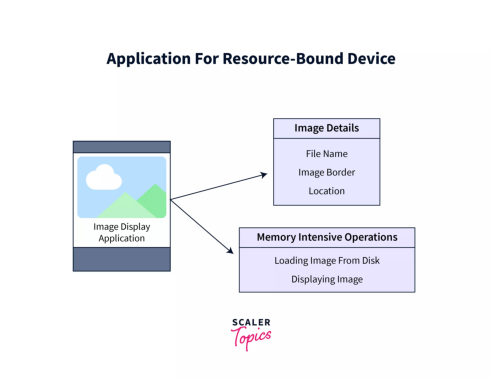

Displaying image1.png


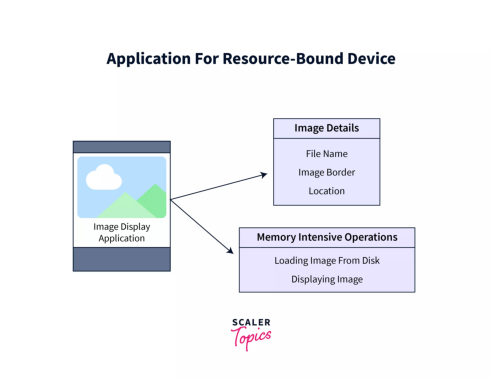

Loading image2.png from disk...
Displaying image2.png


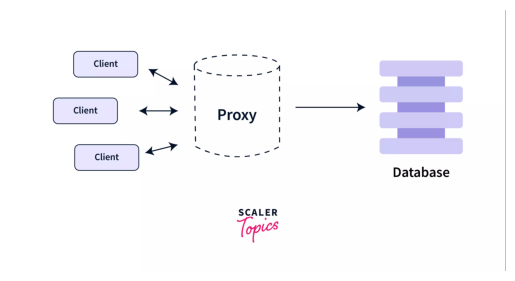

In [9]:
import matplotlib.pyplot as plt
from PIL import Image as PILImage
import time

# Interface
class Image:
    def display(self):
        pass

# Real
class RealImage(Image):
    def __init__(self, filename):
        self.filename = filename
        self.image = None
        self.load_image_from_disk()

    def load_image_from_disk(self):
        # Load
        print(f"Loading {self.filename} from disk...")
        time.sleep(2)  # Delay
        self.image = PILImage.open(self.filename) #reading images

    def display(self):
        # Show
        if self.image:
            print(f"Displaying {self.filename}")
            plt.imshow(self.image)  #  plt form image display 
            plt.axis('off')  
            plt.show()  # image display
        else:
            print(f"Image {self.filename} is not loaded")

# Proxy
class ProxyImage(Image):
    def __init__(self, filename):
        self.filename = filename
        self.real_image = None  # Init

    def display(self):
        # Lazy load
        if self.real_image is None:
            self.real_image = RealImage(self.filename)
        self.real_image.display()

# Client
if __name__ == "__main__":
    # Paths
    image1 = ProxyImage("image1.png")
    image2 = ProxyImage("image2.png")

    # First display
    image1.display()

    # Second display
    image1.display()

    # Another image
    image2.display()
